In [3]:
# Import necessary libraries for data analysis and visualization

import numpy as np 
import pandas as pd  
import scipy.stats as stats  
import warnings  

# Suppress warnings to avoid cluttering the output with warning messages
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns 

# Import variance_inflation_factor from Statsmodels for checking multicollinearity in regression models
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set Pandas display options for better data frame readability

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)


In [4]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [5]:
campaign_table=pd.read_csv(r"campaign_table.csv")
campaign_desc=pd.read_csv(r"campaign_desc.csv")
causal_data=pd.read_csv(r"causal_data.csv")
coupon=pd.read_csv(r"coupon.csv")
coupon_redempt=pd.read_csv(r"coupon_redempt.csv")
hh_demographic=pd.read_csv(r"hh_demographic.csv")
product=pd.read_csv(r"product.csv")
transaction_data=pd.read_csv(r"transaction_data.csv")
t=['campaign_desc','campaign_table','causal_data','coupon','coupon_redempt','hh_demographic','product','transaction_data']

In [6]:
# Display concise summary of the DataFrame 'campaign_table'
campaign_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB


In [139]:
# Display unique values in the 'DESCRIPTION' column of the DataFrame 'campaign_table'
campaign_table['DESCRIPTION'].unique()

array(['TypeA', 'TypeB', 'TypeC'], dtype=object)

In [140]:
# Display unique values in the 'household_key' column of the DataFrame 'campaign_table'
campaign_table['household_key'].unique()

array([  17,   27,  212, ..., 2386,  498,  369], dtype=int64)

In [141]:
# Display unique values in the 'CAMPAIGN' column of the DataFrame 'campaign_table'
campaign_table['CAMPAIGN'].unique()

array([26, 30,  8, 13, 18, 28, 29,  1,  2,  4,  5,  7,  9, 10, 11, 12, 16,
       17, 19, 21, 22, 23, 25, 24, 27,  3, 14, 20,  6, 15], dtype=int64)

In [142]:
# Display concise summary of the DataFrame 'campaign_desc'
campaign_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DESCRIPTION  30 non-null     object
 1   CAMPAIGN     30 non-null     int64 
 2   START_DAY    30 non-null     int64 
 3   END_DAY      30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [143]:
# Display unique values in the 'DESCRIPTION' column of the DataFrame 'campaign_desc'
campaign_desc['DESCRIPTION'].unique()

array(['TypeB', 'TypeC', 'TypeA'], dtype=object)

In [7]:
# Display unique values in the 'CAMPAIGN' column of the DataFrame 'campaign_desc'
campaign_desc['CAMPAIGN'].unique()

array([24, 15, 25, 20, 23, 21, 22, 18, 19, 17, 14, 16, 13, 11, 12, 10,  9,
        8,  7,  6,  3,  5,  4,  1,  2, 30, 29, 28, 27, 26], dtype=int64)

In [145]:
# Display unique values in the 'START_DAY' column of the DataFrame 'campaign_desc'
campaign_desc['START_DAY'].unique()

array([659, 547, 615, 646, 624, 587, 603, 575, 531, 561, 504, 477, 463,
       435, 412, 398, 393, 356, 377, 372, 346, 351, 323, 281, 259, 237,
       224], dtype=int64)

In [10]:
# Display unique values in the 'END_DAY' column of the DataFrame 'campaign_desc'
campaign_desc['END_DAY'].unique()

array([719, 708, 691, 685, 684, 656, 642, 635, 607, 596, 593, 551, 523,
       509, 495, 467, 460, 432, 425, 412, 411, 404, 383, 369, 334, 320,
       300, 264], dtype=int64)

In [11]:
# Display concise summary of the DataFrame 'causal_data'
causal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36786524 entries, 0 to 36786523
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   PRODUCT_ID  int64 
 1   STORE_ID    int64 
 2   WEEK_NO     int64 
 3   display     object
 4   mailer      object
dtypes: int64(3), object(2)
memory usage: 1.4+ GB


In [12]:
# Display unique values in the 'PRODUCT_ID' column of the DataFrame 'causal_data'
causal_data['PRODUCT_ID'].unique()

array([   26190,    26355,    26426, ..., 18243471, 18243476, 18244453],
      dtype=int64)

In [149]:
# Display unique values in the 'STORE_ID' column of the DataFrame 'causal_data'
causal_data['STORE_ID'].unique()

array([  286,   288,   289,   292,   293,   295,   296,   297,   298,
         299,   300,   304,   306,   309,   310,   311,   313,   315,
         316,   317,   318,   319,   320,   321,   322,   323,   324,
         327,   329,   330,   333,   334,   335,   337,   338,   339,
         340,   341,   343,   345,   346,   352,   354,   355,   356,
         358,   359,   360,   361,   362,   363,   364,   365,   367,
         368,   369,   370,   372,   375,   379,   380,   381,   382,
         384,   388,   389,   391,   396,   400,   401,   402,   403,
         404,   406,   408,   410,   412,   414,   420,   421,   422,
         424,   427,   429,   432,   433,   436,   438,   439,   441,
         442,   443,   445,   446,   447,   448,   450, 31401, 31582,
       31642, 31742, 31762, 31782, 31862, 32004, 33923, 34007, 34011,
         366,   374,   415, 34280, 34037,   440,   411], dtype=int64)

In [150]:
# Display unique values in the 'WEEK_NO' column of the DataFrame 'causal_data'
causal_data['WEEK_NO'].unique()

array([ 70,  52,  71,  73,  72,  35,  37,  38,  41,  42,  43,  85,  87,
        88,  89,  90,  91,  92,  32,  33,  34,  36,  39,  40,  84,  86,
        83,  93,  94,  46,  95,  96,  44,  31,  30,  51,  55,  54,  56,
        25,  53,  57,  59,  61,  66,  67,  68,  69,  75,  76,  77,  79,
        81,  82,  19,  45,  49,  58,  64,  74,  24,  27,  28,  29,  47,
        48,  50,  60,  62,  63,  65,  80,   9,  11,  97, 101,  21,  12,
        78,  13,  26,  98,  14,  23,  15,  16,  17,  20,  22,  10,  18,
       100,  99], dtype=int64)

In [13]:
# Display unique values in the 'display' column of the DataFrame 'causal_data'
causal_data['display'].unique()

array(['0', '5', '1', '4', '3', '9', 'A', '6', '7', '2'], dtype=object)

#We Replace the "A" with 8 

In [152]:
# Replace occurrences of 'A' with 8 in the 'display' column of the DataFrame 'causal_data'
causal_data['display'].replace('A',8,inplace=True)

In [153]:
# Display unique values in the 'display' column of the DataFrame 'causal_data'
causal_data['display'].unique()

array(['0', '5', '1', '4', '3', '9', 8, '6', '7', '2'], dtype=object)

In [154]:
# Display unique values in the 'mailer' column of the DataFrame 'causal_data'
causal_data['mailer'].unique()

array(['A', '0', 'H', 'D', 'F', 'J', 'C', 'L', 'X', 'P', 'Z'],
      dtype=object)

In [155]:
# Replace occurrences of '0' with 'B' in the 'mailer' column of the DataFrame 'causal_data'
causal_data['mailer'].replace('0','B',inplace=True)

In [156]:
# Display unique values in the 'mailer' column of the DataFrame 'causal_data'
causal_data['mailer'].unique()

array(['A', 'B', 'H', 'D', 'F', 'J', 'C', 'L', 'X', 'P', 'Z'],
      dtype=object)

In [157]:
# Display concise summary of the DataFrame 'coupon'
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB


In [14]:
# Count the number of unique values in the 'COUPON_UPC' column of the DataFrame 'coupon'
coupon['COUPON_UPC'].nunique()

1135

In [159]:
# Display unique values in the 'PRODUCT_ID' column of the DataFrame 'coupon'
coupon['PRODUCT_ID'].unique()

array([   27160,    27754,    28897, ..., 17330255, 17329098, 17328611],
      dtype=int64)

In [15]:
# Display unique values in the 'CAMPAIGN' column of the DataFrame 'coupon'
coupon['CAMPAIGN'].unique()

array([ 4,  9, 12, 28, 25, 22,  1, 20, 10, 21, 23, 27,  3, 14, 29, 16, 24,
       17,  2, 19,  5, 11,  7, 15,  6, 13,  8, 26, 30, 18], dtype=int64)

In [161]:
# Display concise summary of the DataFrame 'coupon_redempt'
coupon_redempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  2318 non-null   int64
 1   DAY            2318 non-null   int64
 2   COUPON_UPC     2318 non-null   int64
 3   CAMPAIGN       2318 non-null   int64
dtypes: int64(4)
memory usage: 72.6 KB


In [162]:
# Display unique values in the 'household_key' column of the DataFrame 'coupon_redempt'
coupon_redempt['household_key'].unique()

array([   1,    8,   13,   14,   18,   19,   22,   29,   31,   40,   46,
         56,   58,   67,   68,   77,   79,   80,   88,   93,   99,  101,
        104,  105,  113,  115,  117,  125,  127,  139,  143,  156,  158,
        164,  165,  184,  192,  196,  208,  214,  215,  222,  232,  239,
        243,  248,  249,  251,  256,  262,  276,  279,  282,  283,  294,
        305,  306,  307,  318,  321,  324,  334,  345,  346,  351,  353,
        354,  361,  362,  367,  378,  383,  387,  389,  393,  397,  400,
        412,  413,  421,  426,  437,  438,  443,  454,  458,  460,  463,
        464,  469,  472,  473,  484,  485,  490,  492,  503,  518,  523,
        545,  546,  560,  573,  574,  577,  581,  588,  596,  600,  605,
        630,  631,  636,  641,  647,  650,  679,  680,  681,  687,  692,
        696,  699,  702,  703,  709,  712,  715,  716,  718,  725,  740,
        745,  755,  761,  764,  766,  768,  771,  788,  793,  805,  807,
        825,  840,  845,  864,  867,  877,  878,  8

In [163]:
# Display unique values in the 'DAY' column of the DataFrame 'coupon_redempt'
coupon_redempt['DAY'].unique()

array([421, 427, 597, 422, 396, 424, 434, 447, 478, 494, 512, 543, 609,
       636, 642, 647, 651, 540, 428, 515, 599, 634, 637, 684, 228, 243,
       333, 376, 382, 509, 526, 592, 607, 628, 640, 460, 663, 677, 505,
       528, 530, 533, 541, 550, 638, 419, 420, 591, 431, 438, 455, 514,
       608, 610, 616, 632, 639, 665, 681, 691, 601, 602, 612, 486, 542,
       576, 654, 685, 282, 325, 329, 375, 633, 624, 586, 600, 614, 562,
       671, 400, 407, 430, 518, 567, 625, 426, 521, 575, 417, 595, 522,
       535, 598, 621, 524, 443, 287, 516, 611, 669, 590, 606, 439, 529,
       415, 332, 346, 348, 361, 363, 413, 416, 511, 532, 603, 510, 429,
       507, 579, 678, 437, 464, 262, 425, 536, 549, 594, 414, 531, 446,
       259, 231, 256, 545, 626, 508, 605, 596, 520, 330, 232, 338, 344,
       358, 444, 450, 604, 660, 673, 680, 241, 458, 593, 517, 442, 504,
       538, 539, 582, 653, 656, 686, 683, 453, 617, 635, 337, 620, 467,
       457, 627, 258, 377, 506, 589, 557, 523, 459, 554, 585, 43

In [16]:
# Display unique values in the 'COUPON_UPC' column of the DataFrame 'coupon_redempt'
coupon_redempt['COUPON_UPC'].unique()

array([10000085364, 51700010076, 54200000033, 10000085476, 54200029176,
       53600000078, 53700048182, 52370020076, 53600050042, 53600000082,
       51600070033, 52500060033, 54154889076, 10000085427, 52740022050,
       10000089277, 51800015050, 53500035050, 54105800093, 52800031032,
       51312010033, 53980010082, 10000089316, 54400021032, 51800000050,
       10000089128, 51480000076, 53700020076, 55000013033, 10000085429,
       51380020033, 55000013050, 10000085475, 55000013950, 52500010050,
       54100027032, 51111540076, 55410000076, 52500010033, 55150054075,
       52277610055, 53450050033, 54300026150, 54850011033, 51440050055,
       10000085484, 10000089284, 51800010250, 54300026050, 54850010033,
       52100000031, 54450000076, 10000085486, 55100012140, 53000000036,
       54060060033, 10000089106, 53620010050, 10000089098, 10000089101,
       50800490076, 51254711082, 57455024475, 55942700087, 57410101082,
       52000030042, 54060060076, 10000085361, 10000085363, 57800

In [165]:
# Count the number of occurrences of each unique value in the 'COUPON_UPC' column of the DataFrame 'coupon_redempt
coupon_redempt['COUPON_UPC'].value_counts()

COUPON_UPC
10000085475    63
51600070033    56
54154888076    49
10000085429    45
10000085363    42
10000085364    39
10000085425    35
10000085479    34
10000085477    28
10000085426    28
55410000076    28
53800050033    27
10000085361    25
51800015050    25
54850010033    24
57631000076    24
54900050076    20
10000085478    20
52100023024    19
10000085427    19
54300026050    19
52740022050    19
53620010050    18
54300020076    18
54100027032    17
53010010033    16
57047091041    16
53600000078    16
53700048182    16
57045970076    16
55000013950    15
51960010076    15
57143020076    15
54900050082    15
53620010028    15
10000089290    14
54060060076    14
10000089124    13
54200000076    13
51800000050    13
10000085476    13
56414410013    12
10000085428    11
52000030042    11
51480000076    11
54200029176    11
52500010050    11
10000089106    10
10000089073    10
52580010042    10
55100012140    10
53500000076     9
57680810050     9
52898920076     9
53800030050     9

In [166]:
# Display unique values in the 'CAMPAIGN' column of the DataFrame 'coupon_redempt'
coupon_redempt['CAMPAIGN'].unique()

array([ 8, 18,  5, 11, 10, 13, 22, 20, 26, 30,  4,  9, 23, 19, 17, 25, 14,
       29,  1,  7, 16,  2, 27, 24, 15, 12, 21,  6,  3, 28], dtype=int64)

In [167]:
# Display concise summary of the DataFrame 'hh_demographic'
hh_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [168]:
# Display unique values in the 'AGE_DESC' column of the DataFrame 'hh_demographic'
hh_demographic['AGE_DESC'].unique()

array(['65+', '45-54', '25-34', '35-44', '19-24', '55-64'], dtype=object)

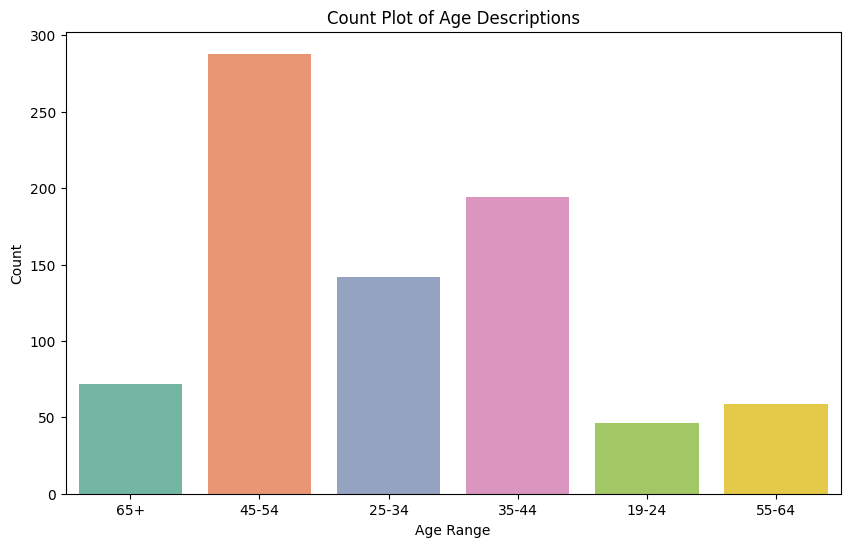

In [169]:
import seaborn as sns  
import matplotlib.pyplot as plt  

# Create a figure with a specified size (10 inches by 6 inches)
plt.figure(figsize=(10, 6))

# Create a count plot using Seaborn to display the count of each unique value in the 'AGE_DESC' column
sns.countplot(data=hh_demographic, x='AGE_DESC', palette='Set2')  

plt.title('Count Plot of Age Descriptions')

plt.xlabel('Age Range')

plt.ylabel('Count')

plt.show()


In [ ]:
#Observations

In [170]:
# Display unique values in the 'MARITAL_STATUS_CODE' column of the DataFrame 'hh_demographic'
hh_demographic['MARITAL_STATUS_CODE'].unique()

array(['A', 'U', 'B'], dtype=object)

In [171]:

# Replace values in the 'MARITAL_STATUS_CODE' column of the DataFrame 'hh_demographic' with descriptive labels

# Replace 'A' with 'Married' in the 'MARITAL_STATUS_CODE' column
hh_demographic['MARITAL_STATUS_CODE'].replace('A', 'Married', inplace=True)

# Replace 'U' with 'Unknown' in the 'MARITAL_STATUS_CODE' column
hh_demographic['MARITAL_STATUS_CODE'].replace('U', 'Unknown', inplace=True)

# Replace 'B' with 'Single' in the 'MARITAL_STATUS_CODE' column
hh_demographic['MARITAL_STATUS_CODE'].replace('B', 'Single', inplace=True)


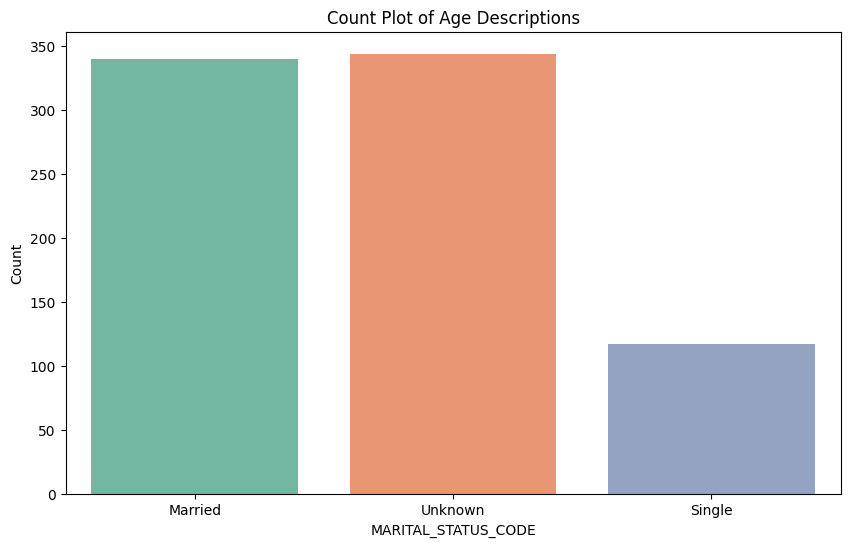

In [172]:
plt.figure(figsize=(10, 6))
# Create a count plot using Seaborn to display the count of each unique value in the 'MARITAL_STATUS_CODE' column
sns.countplot(data=hh_demographic, x='MARITAL_STATUS_CODE', palette='Set2')
plt.title('Count Plot of Age Descriptions')
plt.xlabel('MARITAL_STATUS_CODE')
plt.ylabel('Count')
plt.show()

In [173]:
# Display unique values in the 'INCOME_DESC' column of the DataFrame 'hh_demographic'
hh_demographic['INCOME_DESC'].unique()

array(['35-49K', '50-74K', '25-34K', '75-99K', 'Under 15K', '100-124K',
       '15-24K', '125-149K', '150-174K', '250K+', '175-199K', '200-249K'],
      dtype=object)

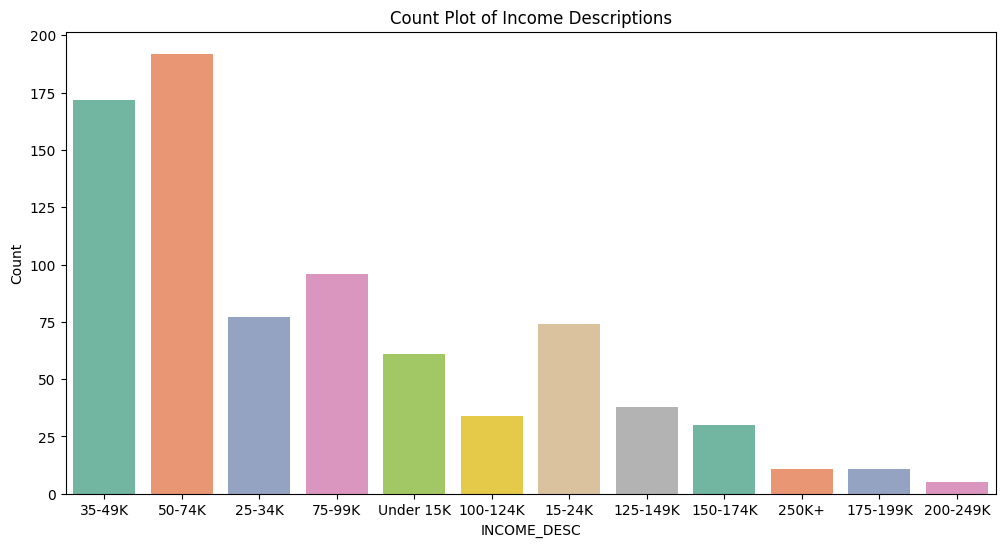

In [174]:
# Create a count plot using Seaborn to display the count of each unique value in the 'INCOME_DESC' column
plt.figure(figsize=(12, 6))
sns.countplot(data=hh_demographic, x='INCOME_DESC', palette='Set2')
plt.title('Count Plot of Income Descriptions')
plt.xlabel('INCOME_DESC')
plt.ylabel('Count')
plt.show()

In [175]:
# Display unique values in the 'HOMEOWNER_DESC' column of the DataFrame 'hh_demographic'
hh_demographic['HOMEOWNER_DESC'].unique()

array(['Homeowner', 'Unknown', 'Renter', 'Probable Renter',
       'Probable Owner'], dtype=object)

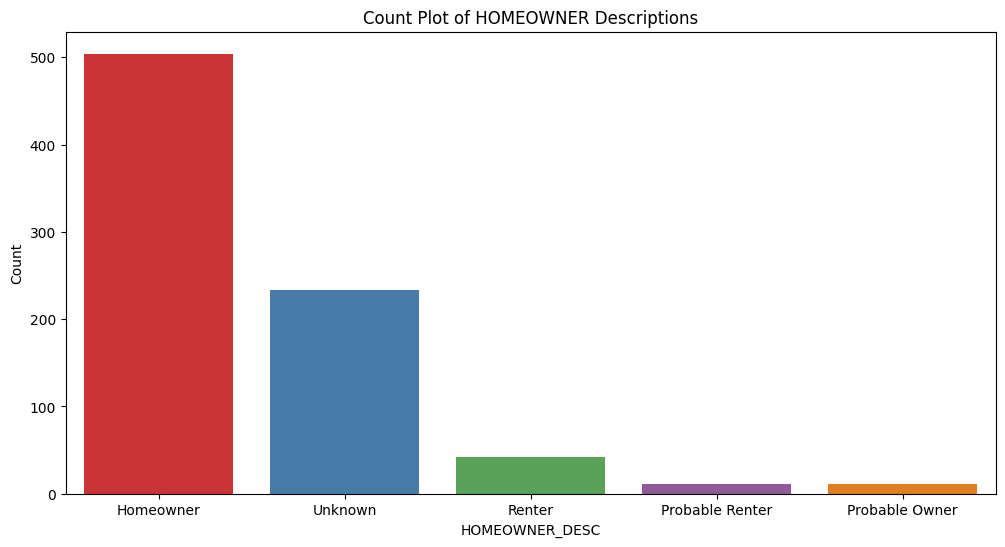

In [176]:
# Create a count plot using Seaborn to display the count of each unique value in the 'HOMEOWNER_DESC' column
plt.figure(figsize=(12, 6))
sns.countplot(data=hh_demographic, x='HOMEOWNER_DESC', palette='Set1')
plt.title('Count Plot of HOMEOWNER Descriptions')
plt.xlabel('HOMEOWNER_DESC')
plt.ylabel('Count')
plt.show()

In [177]:
# Display unique values in the 'HH_COMP_DESC' column of the DataFrame 'hh_demographic'
hh_demographic['HH_COMP_DESC'].unique()

array(['2 Adults No Kids', '2 Adults Kids', 'Single Female', 'Unknown',
       'Single Male', '1 Adult Kids'], dtype=object)

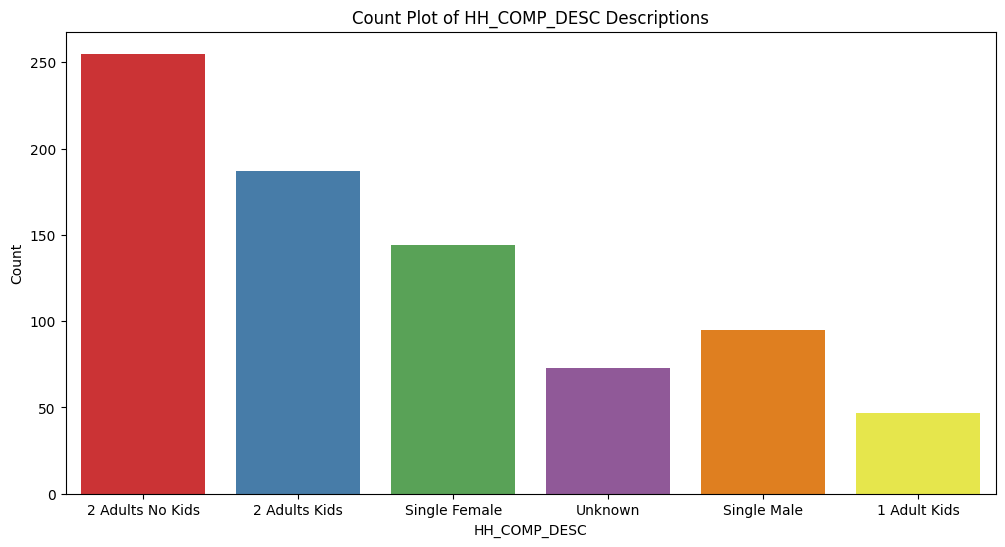

In [178]:
# Create a count plot using Seaborn to display the count of each unique value in the 'HH_COMP_DESC' column
plt.figure(figsize=(12, 6))
sns.countplot(data=hh_demographic, x='HH_COMP_DESC', palette='Set1')
plt.title('Count Plot of HH_COMP_DESC Descriptions')
plt.xlabel('HH_COMP_DESC')
plt.ylabel('Count')
plt.show()

In [179]:
# Display unique values in the 'HOUSEHOLD_SIZE_DESC' column of the DataFrame 'hh_demographic'
hh_demographic['HOUSEHOLD_SIZE_DESC'].unique()

array(['2', '3', '4', '1', '5+'], dtype=object)

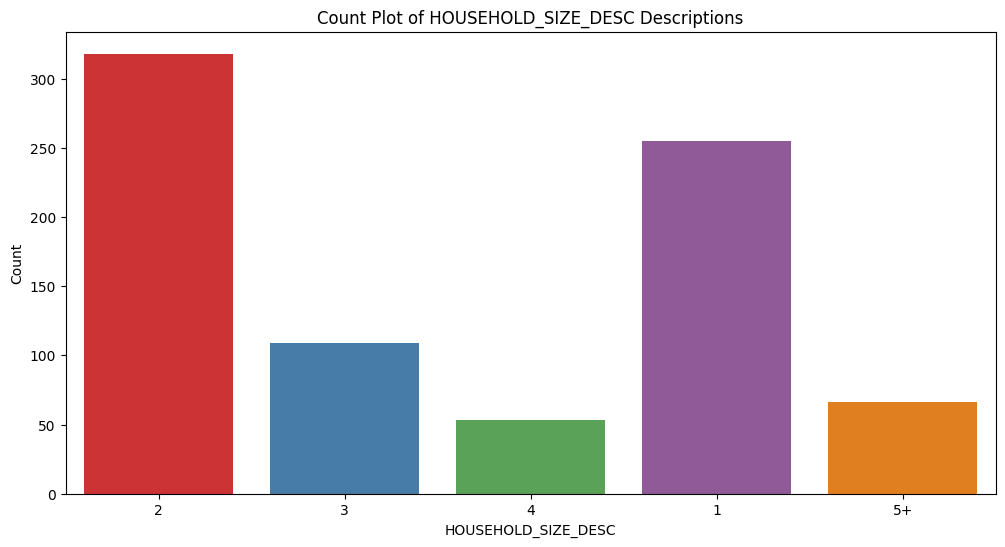

In [180]:
# Create a count plot using Seaborn to display the count of each unique value in the 'HOUSEHOLD_SIZE_DESC' column
plt.figure(figsize=(12, 6))
sns.countplot(data=hh_demographic, x='HOUSEHOLD_SIZE_DESC', palette='Set1')
plt.title('Count Plot of HOUSEHOLD_SIZE_DESC Descriptions')
plt.xlabel('HOUSEHOLD_SIZE_DESC')
plt.ylabel('Count')
plt.show()

In [181]:
# Display unique values in the 'KID_CATEGORY_DESC' column of the DataFrame 'hh_demographic'
hh_demographic['KID_CATEGORY_DESC'].unique()

array(['None/Unknown', '1', '2', '3+'], dtype=object)

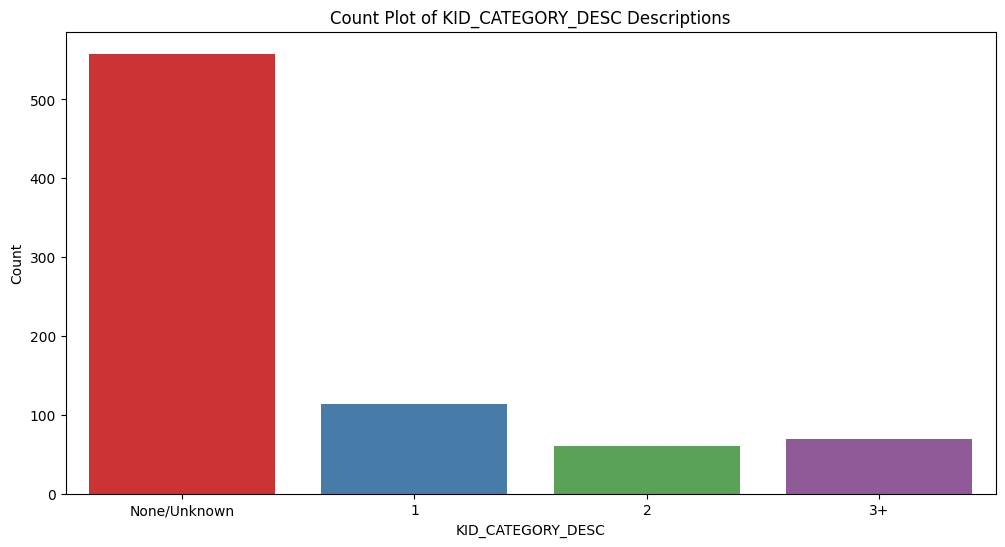

In [182]:
# Create a count plot using Seaborn to display the count of each unique value in the 'KID_CATEGORY_DESC' column
plt.figure(figsize=(12, 6))
sns.countplot(data=hh_demographic, x='KID_CATEGORY_DESC', palette='Set1')
plt.title('Count Plot of KID_CATEGORY_DESC Descriptions')
plt.xlabel('KID_CATEGORY_DESC')
plt.ylabel('Count')
plt.show()

In [183]:
# Display unique values in the 'household_key' column of the DataFrame 'hh_demographic'
hh_demographic['household_key'].unique()

array([   1,    7,    8,   13,   16,   17,   18,   19,   20,   22,   25,
         27,   31,   39,   40,   42,   43,   46,   48,   49,   52,   55,
         56,   57,   58,   67,   71,   74,   77,   78,   80,   85,   86,
         97,   98,  101,  104,  105,  109,  110,  113,  114,  117,  118,
        119,  121,  123,  127,  131,  133,  134,  136,  139,  149,  155,
        157,  158,  159,  161,  164,  165,  166,  170,  178,  184,  192,
        193,  198,  201,  208,  209,  211,  212,  214,  216,  218,  219,
        220,  221,  222,  230,  232,  235,  239,  242,  243,  248,  249,
        250,  253,  256,  257,  263,  264,  276,  281,  282,  283,  289,
        290,  294,  300,  301,  302,  304,  306,  309,  314,  317,  319,
        321,  324,  325,  329,  332,  334,  346,  350,  351,  353,  354,
        358,  361,  362,  367,  370,  371,  377,  378,  381,  383,  385,
        386,  387,  389,  390,  391,  392,  395,  400,  404,  409,  410,
        411,  412,  413,  417,  418,  426,  428,  4

In [184]:
# Display information about the 'product' DataFrame
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


In [185]:
# Display unique values in the 'PRODUCT_ID' column of the DataFrame 'product'
product['PRODUCT_ID'].unique()

array([   25671,    26081,    26093, ..., 18293696, 18294080, 18316298],
      dtype=int64)

In [186]:
# Display unique values in the 'MANUFACTURER' column of the DataFrame 'product'
product['MANUFACTURER'].unique()

array([   2,   69,   16, ..., 2748, 4868, 2227], dtype=int64)

In [187]:
# Display unique values in the 'DEPARTMENT' column of the DataFrame 'product'
product['DEPARTMENT'].unique()

array(['GROCERY', 'MISC. TRANS.', 'PASTRY', 'DRUG GM', 'MEAT-PCKGD',
       'SEAFOOD-PCKGD', 'PRODUCE', 'NUTRITION', 'DELI', 'COSMETICS',
       'MEAT', 'FLORAL', 'TRAVEL & LEISUR', 'SEAFOOD', 'MISC SALES TRAN',
       'SALAD BAR', 'KIOSK-GAS', 'ELECT &PLUMBING', 'GRO BAKERY',
       'GM MERCH EXP', 'FROZEN GROCERY', 'COUP/STR & MFG', 'SPIRITS',
       'GARDEN CENTER', 'TOYS', 'CHARITABLE CONT', 'RESTAURANT', 'RX',
       'PROD-WHS SALES', 'MEAT-WHSE', 'DAIRY DELI', 'CHEF SHOPPE', 'HBC',
       'DELI/SNACK BAR', 'PORK', 'AUTOMOTIVE', 'VIDEO RENTAL', ' ',
       'CNTRL/STORE SUP', 'HOUSEWARES', 'POSTAL CENTER', 'PHOTO', 'VIDEO',
       'PHARMACY SUPPLY'], dtype=object)

In [188]:
# Replace empty or whitespace values in the 'DEPARTMENT' column with 'Unknown'
product['DEPARTMENT'].replace(" ",'Unknown',inplace=True)

In [189]:
# Display the count of unique values in the 'DEPARTMENT' column of the DataFrame 'product'
product['DEPARTMENT'].value_counts()

DEPARTMENT
GROCERY            39021
DRUG GM            31529
PRODUCE             3118
COSMETICS           3011
NUTRITION           2914
MEAT                2544
MEAT-PCKGD          2427
DELI                2354
PASTRY              2149
FLORAL               938
SEAFOOD-PCKGD        563
MISC. TRANS.         490
SPIRITS              377
SEAFOOD              369
GARDEN CENTER        128
RESTAURANT           102
MISC SALES TRAN       88
SALAD BAR             48
COUP/STR & MFG        39
TRAVEL & LEISUR       28
FROZEN GROCERY        23
KIOSK-GAS             16
Unknown               15
CHEF SHOPPE           14
RX                     9
CNTRL/STORE SUP        4
DAIRY DELI             3
TOYS                   3
POSTAL CENTER          3
GM MERCH EXP           3
VIDEO RENTAL           3
AUTOMOTIVE             2
PHOTO                  2
VIDEO                  2
PROD-WHS SALES         2
DELI/SNACK BAR         2
CHARITABLE CONT        2
GRO BAKERY             2
PORK                   1
HBC           

In [190]:
# Display unique values in the 'BRAND' column of the DataFrame 'product'
product['BRAND'].unique()

array(['National', 'Private'], dtype=object)

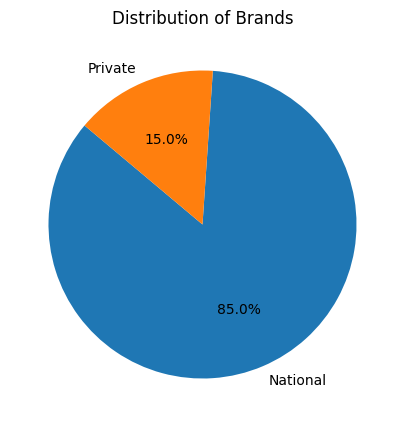

In [191]:
# Create a pie chart to visualize the distribution of brands
brand_counts = product['BRAND'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Brands')
plt.show()


In [192]:
# Display unique values in the 'COMMODITY_DESC' column of the DataFrame 'product'
product['COMMODITY_DESC'].unique()

array(['FRZN ICE', 'NO COMMODITY DESCRIPTION', 'BREAD',
       'FRUIT - SHELF STABLE', 'COOKIES/CONES', 'SPICES & EXTRACTS',
       'VITAMINS', 'BREAKFAST SWEETS', 'PNT BTR/JELLY/JAMS',
       'ICE CREAM/MILK/SHERBTS', 'MAGAZINE', 'AIR CARE', 'CHEESE',
       'SHORTENING/OIL', 'COFFEE', 'DIETARY AID PRODUCTS',
       'PAPER HOUSEWARES', 'BAKED BREAD/BUNS/ROLLS',
       'VEGETABLES - SHELF STABLE', 'HISPANIC', 'DINNER MXS:DRY',
       'CONDIMENTS/SAUCES', 'FRZN VEGETABLE/VEG DSH', 'BAKING NEEDS',
       'DINNER SAUSAGE', 'FRZN FRUITS', 'SEAFOOD - FROZEN',
       'HOUSEHOLD CLEANG NEEDS', 'FD WRAPS/BAGS/TRSH BG',
       'DRY MIX DESSERTS', 'PICKLE/RELISH/PKLD VEG', 'CAKES',
       'BAKING MIXES', 'POTATOES', 'FLUID MILK PRODUCTS', 'SOUP',
       'BAKED SWEET GOODS', 'COOKIES', 'DRY BN/VEG/POTATO/RICE',
       'FACIAL TISS/DNR NAPKIN', 'FROZEN PIZZA', 'EGGS',
       'REFRGRATD DOUGH PRODUCTS', 'HOT CEREAL', 'COLD CEREAL',
       'SUGARS/SWEETNERS', 'SEAFOOD - SHELF STABLE', 'POPCORN',
   

In [193]:
# Display unique values in the 'SUB_COMMODITY_DESC' column of the DataFrame 'product'
product['SUB_COMMODITY_DESC'].unique()

array(['ICE - CRUSHED/CUBED', 'NO SUBCOMMODITY DESCRIPTION',
       'BREAD:ITALIAN/FRENCH', ..., 'SEMI MOIST CAT FOOD: BOX',
       'BERRIES OTHER', 'ROSES OTHER'], dtype=object)

In [194]:
# Display unique values in the 'CURR_SIZE_OF_PRODUCT' column of the DataFrame 'product'
product['CURR_SIZE_OF_PRODUCT'].unique()

array(['22 LB', ' ', '50 OZ', ..., '6.3 IN', '35 LD', '2 LTR PET'],
      dtype=object)

In [195]:
# Display the first few rows of the 'product' DataFrame to get an overview of the data
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [196]:
# Display information about the 'transaction_data' DataFrame
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [197]:
# Display unique values in the 'household_key' column of the DataFrame 'transaction_data'
transaction_data['household_key'].unique()

array([2375, 1364, 1130, ..., 1581, 1984, 2325], dtype=int64)

In [198]:
# Display unique values in the 'BASKET_ID' column of the DataFrame 'transaction_data'
transaction_data['BASKET_ID'].unique()

array([26984851472, 26984851516, 26984896261, ..., 42302712298,
       42305362497, 42305362535], dtype=int64)

In [199]:
# Display unique values in the 'DAY' column of the DataFrame 'transaction_data'
transaction_data['DAY'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [200]:
# Display unique values in the 'SALES_VALUE' column of the DataFrame 'transaction_data'
transaction_data['SALES_VALUE'].unique()

array([ 1.39,  0.82,  0.99, ..., 44.14, 41.09, 33.04])

In [201]:
# Display unique values in the 'STORE_ID' column of the DataFrame 'transaction_data'
transaction_data['STORE_ID'].unique()

array([  364, 31742, 31642,   412,   337,   396,   315,   447, 31582,
         288,   400,   304,   324,  2602,   440,   286, 31782,   414,
         446,   299,   329,   424,   317,   367,   427,   296, 32004,
         330,   358,   442,   323,   327,   406,   292,   401,   382,
         375,   436,   333,   359,   391,   345,   322,   634,    27,
         295,   441,   388,   374,   381,   368,   319,   352,   356,
         321,   443,   306,   402,   790,  3313,   408,   384,   439,
         422,   310,   370,   320,   298,   363,   379,   403,   341,
         313,   420,   438,   334, 31862,   297,   448, 31401,   410,
         433,   563,   445,   300,   421,   318,   380,   555,   362,
         372,   361,   450,   354,   311,   339,   355,   316,   289,
         483,   389,   309,   340, 31762,   293,   369,   432,   429,
         338,   366,  3217,   360,   365,   498,   566,   335,   346,
        2915,  3262,  2866,   404,   678,     1,    46,   569,  2865,
        3182,   901,

In [202]:
# Display unique values in the 'RETAIL_DISC' column of the DataFrame 'transaction_data'
transaction_data['RETAIL_DISC'].unique()

array([ -0.6 ,   0.  ,  -0.3 , ..., -21.49, -22.54, -27.02])

In [203]:
# Display unique values in the 'TRANS_TIME' column of the DataFrame 'transaction_data'
transaction_data['TRANS_TIME'].unique()

array([1631, 1642, 1520, ...,  307,  313,  433], dtype=int64)

In [204]:
# Display unique values in the 'WEEK_NO' column of the DataFrame 'transaction_data'
transaction_data['WEEK_NO'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  35,  34,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102], dtype=int64)

In [205]:
# Display unique values in the 'COUPON_DISC' column of the DataFrame 'transaction_data'
transaction_data['COUPON_DISC'].unique()

array([  0.  ,  -1.  ,  -0.4 ,  -0.75,  -0.59,  -0.55,  -2.  ,  -2.25,
        -1.1 ,  -0.5 ,  -0.25,  -2.19,  -0.3 ,  -2.89,  -3.  ,  -0.6 ,
        -0.35,  -5.  ,  -1.5 ,  -1.29,  -8.75,  -0.99,  -0.34,  -6.  ,
        -1.59,  -0.79,  -1.25,  -1.19,  -4.  , -16.  ,  -1.49,  -1.75,
        -1.4 ,  -1.05,  -0.74,  -0.45, -11.  ,  -0.7 ,  -0.9 ,  -5.99,
        -1.99,  -9.99,  -4.5 ,  -3.99,  -0.49,  -2.5 ,  -1.15,  -3.29,
        -0.95,  -4.79,  -0.09,  -1.65,  -3.08,  -3.49,  -2.14,  -0.2 ,
        -2.49, -12.  ,  -3.19,  -2.99, -16.99,  -1.98,  -3.25,  -2.88,
        -1.24,  -0.88,  -2.1 ,  -2.59,  -2.75, -10.32,  -3.3 ,  -1.69,
        -2.2 ,  -1.34,  -3.6 ,  -0.66,  -2.64,  -1.79,  -2.58,  -5.16,
        -2.79,  -4.27,  -2.24,  -6.45,  -0.8 ,  -5.5 , -13.94,  -4.99,
        -3.5 ,  -9.  , -15.58,  -0.76, -13.98,  -1.76,  -0.15,  -5.75,
        -3.48, -13.99,  -2.55,  -3.05,  -2.67,  -8.98,  -0.85,  -8.  ,
        -1.66,  -7.99,  -5.98,  -1.09,  -4.19,  -9.75,  -4.29,  -1.7 ,
      

In [206]:
# Print the column names of the DataFrame 'transaction_data'
print(transaction_data.columns)

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC'],
      dtype='object')


In [207]:
# Display the first few rows of the 'transaction_data' DataFrame to get an overview of the data
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [208]:
# Count the number of unique values in the 'PRODUCT_ID' column of the DataFrame 'product'
product.PRODUCT_ID.nunique()

92353

In [286]:
# Display the first few rows of the 'product' DataFrame to get an overview of the data
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,Coupon_Provided,Target
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,Provided,0.0
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,Not Provided,NaN
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,Not Provided,NaN
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,Provided,0.0
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,Not Provided,NaN


In [287]:
# Display the first few rows of the 'coupon' DataFrame to get an overview of the data
coupon.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [209]:
# Count the number of unique values in the 'PRODUCT_ID' column of the DataFrame 'coupon'
coupon.PRODUCT_ID.nunique()

44133

In [210]:
# Triming the transaction_data table.
transaction_data=transaction_data[(transaction_data.QUANTITY!=0)&(transaction_data.SALES_VALUE!=0)]

In [211]:
coupon.PRODUCT_ID.nunique()   
# 44k are those products for which coupons were provided out of 92k.

44133

In [212]:
# creating the list containing the products for which coupon was provided.
productsforwhichcouponwasprovided=list(coupon.PRODUCT_ID.unique())
len(productsforwhichcouponwasprovided)

44133

In [213]:
product.PRODUCT_ID.nunique()-coupon.PRODUCT_ID.nunique()     
# 48k are those products for which coupons were not provided according to coupon table

48220

In [214]:
transaction_data[(transaction_data.SALES_VALUE>0)&(transaction_data.QUANTITY>0)&(transaction_data.COUPON_DISC<0)]['PRODUCT_ID'].nunique()
# 9.2k are those products for which coupon was redempt.

9226

In [215]:
# Save with a different separator and without header
causal_data.to_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\casual2.csv', index=False, sep=',', header=True)


In [216]:
# Display information about the 'causal_data' DataFrame
causal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36786524 entries, 0 to 36786523
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   PRODUCT_ID  int64 
 1   STORE_ID    int64 
 2   WEEK_NO     int64 
 3   display     object
 4   mailer      object
dtypes: int64(3), object(2)
memory usage: 1.4+ GB


In [217]:
# Drop the 'CURR_SIZE_OF_PRODUCT' column from the 'product' DataFrame
product.drop('CURR_SIZE_OF_PRODUCT',axis=1, inplace=True)

In [218]:
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES


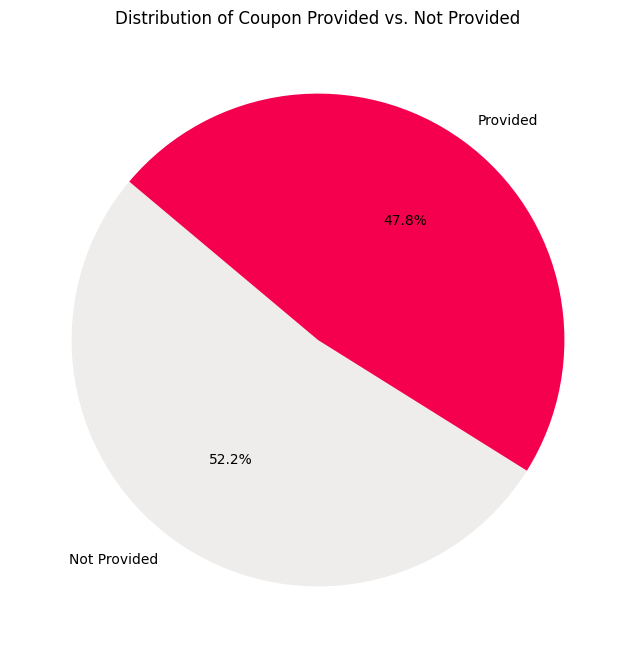

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a list of unique PRODUCT_IDs from the 'coupon' DataFrame
productsforwhichcouponwasprovided = list(coupon.PRODUCT_ID.unique())

# Create a new column in the 'product' DataFrame to indicate whether a coupon was provided for each product
product['Coupon_Provided'] = product['PRODUCT_ID'].apply(lambda x: 'Provided' if x in productsforwhichcouponwasprovided else 'Not Provided')

# Calculate the distribution of coupon provided vs. not provided
coupon_distribution = product['Coupon_Provided'].value_counts()

# Plot a pie chart to visualize the distribution of coupon provided vs. not provided
plt.figure(figsize=(8, 8))  
plt.pie(coupon_distribution, labels=coupon_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#EEEDEB', '#F5004F'])
# 'autopct' displays the percentage value on the pie chart
# 'startangle' rotates the start of the pie chart for better aesthetics
# 'colors' specifies the colors for the pie segments
plt.title('Distribution of Coupon Provided vs. Not Provided')  # Set the title of the pie chart
plt.show()  # Display the pie chart

In [220]:
# Calculate the counts of each unique value in the 'Coupon_Provided' column of the 'product' DataFrame
product['Coupon_Provided'].value_counts()

Coupon_Provided
Not Provided    48220
Provided        44133
Name: count, dtype: int64

In [221]:
# creating the list containing the products for which coupon was provided.
productsforwhichcouponwasprovided=list(coupon.PRODUCT_ID.unique())
len(productsforwhichcouponwasprovided)

44133

In [222]:
product.PRODUCT_ID.nunique()-coupon.PRODUCT_ID.nunique()     
# 48k are those products for which coupons were not provided according to coupon table.

48220

In [223]:
transaction_data[(transaction_data.SALES_VALUE>0)&(transaction_data.QUANTITY>0)&(transaction_data.COUPON_DISC<0)]['PRODUCT_ID'].nunique()
# 9.2k are those products for which coupon was redempt.

9226

In [224]:
# creating the list containing the products for which coupon was redempt.
productsforwhichcouponwasredempt=list(transaction_data.loc[(transaction_data.SALES_VALUE>0)&(transaction_data.QUANTITY>0)&(transaction_data.COUPON_DISC<0),'PRODUCT_ID'].unique())
len(productsforwhichcouponwasredempt)

9226

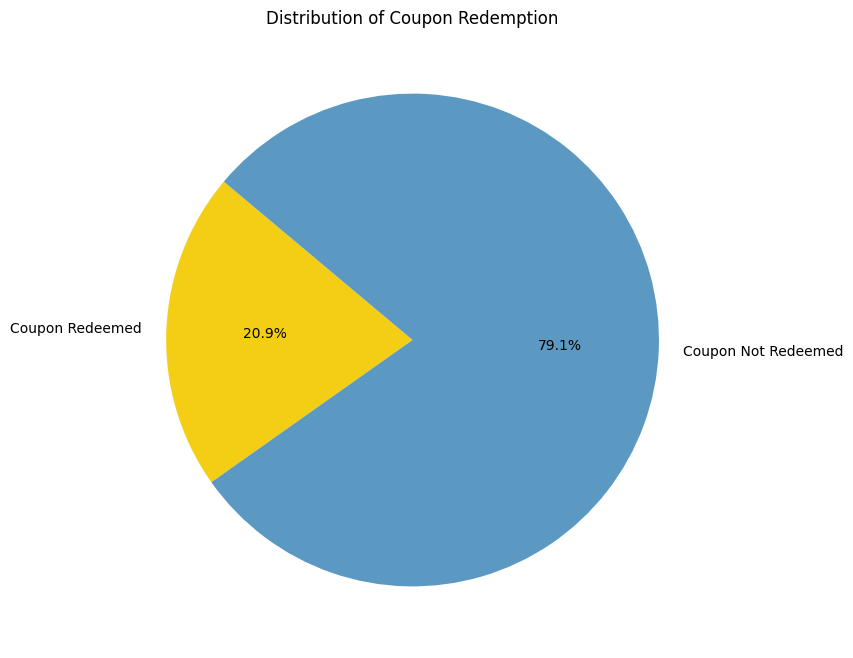

In [225]:
import pandas as pd
import matplotlib.pyplot as plt


redeemed_products = transaction_data[(transaction_data['SALES_VALUE'] > 0) &
                                     (transaction_data['QUANTITY'] > 0) &
                                     (transaction_data['COUPON_DISC'] < 0)]['PRODUCT_ID'].nunique()
# Filters the transaction_data DataFrame to include only transactions where 'SALES_VALUE' and 'QUANTITY' are greater than zero and 'COUPON_DISC' is less than zero (indicating coupon usage). 
# Then, it counts the number of unique 'PRODUCT_ID's to determine how many products had their coupons redeemed.

# Computes the number of products with coupons not redeemed by subtracting the count of redeemed products from the total number of products with coupons.
num_not_redeemed = len(productsforwhichcouponwasprovided) - redeemed_products

# Prepare data for the pie chart
labels = ['Coupon Redeemed', 'Coupon Not Redeemed']
sizes = [redeemed_products, num_not_redeemed]
colors = ['#F4CE14', '#5B99C2']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Coupon Redemption')
plt.show()


In [226]:
redeemed_products

9226

In [227]:

# creation of the target variable..
p1 = product[product.PRODUCT_ID.isin(productsforwhichcouponwasprovided)]
p1['Target'] = p1.PRODUCT_ID.isin(productsforwhichcouponwasredempt).astype('int')
product['Target'] = p1['Target']
del p1

In [228]:
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,Coupon_Provided,Target
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,Provided,0.0
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,Not Provided,NaN
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,Not Provided,NaN
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,Provided,0.0
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,Not Provided,NaN


In [291]:
product['Target'].isnull().sum()

48220

In [290]:
p2 = product[product.PRODUCT_ID.isin(productsforwhichcouponwasprovided)]
p2['Target'] = p2.PRODUCT_ID.isin(productsforwhichcouponwasredempt).astype('int')
#product['Target'] = p1['Target']
p2['Target'].value_counts()

Target
0    37995
1     6138
Name: count, dtype: int64

In [229]:
# function for creating target variable..
def yo(x):
    if (x in productsforwhichcouponwasprovided)&(x not in productsforwhichcouponwasredempt):
        return 0
    if (x in productsforwhichcouponwasprovided)&(x in productsforwhichcouponwasredempt):
        return 1
    if (x not in productsforwhichcouponwasprovided):
        return np.nan
product['Target']=product.PRODUCT_ID.apply(yo)

In [230]:
#product['Target'].fillna(-1, inplace=True)


In [231]:
product['Target'].value_counts()

Target
0.0    37995
1.0     6138
Name: count, dtype: int64

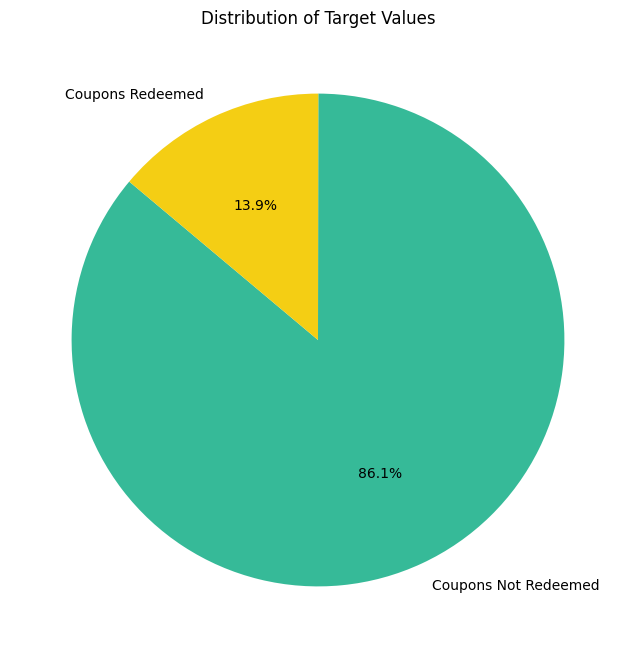

In [232]:


# Assuming the `product` DataFrame contains the `Target` column

# Get the value counts for the Target column
target_counts = product['Target'].value_counts()

labels = ['Coupons Not Redeemed','Coupons Redeemed']

# Plot the pie chart with percentages
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#36BA98', '#F4CE14'])

# Add a title
plt.title('Distribution of Target Values')

# Show the plot
plt.show()


In [233]:
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,Coupon_Provided,Target
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,Provided,0.0
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,Not Provided,NaN
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,Not Provided,NaN
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,Provided,0.0
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,Not Provided,NaN


In [234]:
# checking for null values.
product.isnull().sum()

PRODUCT_ID                0
MANUFACTURER              0
DEPARTMENT                0
BRAND                     0
COMMODITY_DESC            0
SUB_COMMODITY_DESC        0
Coupon_Provided           0
Target                48220
dtype: int64

In [235]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PRODUCT_ID          92353 non-null  int64  
 1   MANUFACTURER        92353 non-null  int64  
 2   DEPARTMENT          92353 non-null  object 
 3   BRAND               92353 non-null  object 
 4   COMMODITY_DESC      92353 non-null  object 
 5   SUB_COMMODITY_DESC  92353 non-null  object 
 6   Coupon_Provided     92353 non-null  object 
 7   Target              44133 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 5.6+ MB


In [236]:
# MANUFACTURER is numercial columns with categorical properties. => before encoding and scaling to dtype to be changed.
product['MANUFACTURER']=product['MANUFACTURER'].astype('object')

In [237]:
# Create a copy of the 'product' DataFrame to avoid modifying the original DataFrame
d = product.copy()

# Set 'PRODUCT_ID' as the index of the 'd' DataFrame
d.set_index('PRODUCT_ID', inplace=True)

# Display the first few rows of the 'd' DataFrame
d.head()

,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,Coupon_Provided,Target
PRODUCT_ID,,,,,,,
25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,Provided,0.0
26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,Not Provided,NaN
26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,Not Provided,NaN
26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,Provided,0.0
26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,Not Provided,NaN


In [238]:
#selecting object datatype
catcol=d.select_dtypes('object').columns
#selecting int datatype names
numcol=d.select_dtypes(np.number).columns

In [239]:
# Feature Engineering..
# unique count of households that has purchased that particular product over the span of 2 years.
d['num_hsld_prch_prd']=transaction_data.groupby('PRODUCT_ID')['household_key'].nunique()

# unique count of stores that sells that particlar products.
d['num_stores_has_prd']=transaction_data.groupby('PRODUCT_ID')['STORE_ID'].nunique()

# count of products sold during the span of 2 years.
d['quantity_sold_total']=transaction_data.groupby('PRODUCT_ID')['QUANTITY'].sum()

In [240]:
d['num_hsld_prch_prd'].count()

91905

In [241]:
d.head()

,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,Coupon_Provided,Target,num_hsld_prch_prd,num_stores_has_prd,quantity_sold_total
PRODUCT_ID,,,,,,,,,,
25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,Provided,0.0,3.0,3.0,6.0
26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,Not Provided,NaN,1.0,1.0,1.0
26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,Not Provided,NaN,1.0,1.0,1.0
26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,Provided,0.0,1.0,1.0,1.0
26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,Not Provided,NaN,1.0,1.0,2.0


In [242]:

d.isnull().sum()

MANUFACTURER               0
DEPARTMENT                 0
BRAND                      0
COMMODITY_DESC             0
SUB_COMMODITY_DESC         0
Coupon_Provided            0
Target                 48220
num_hsld_prch_prd        448
num_stores_has_prd       448
quantity_sold_total      448
dtype: int64

In [243]:
# Some products were never purchased.. => to be removed
product.PRODUCT_ID.nunique()-transaction_data.PRODUCT_ID.nunique()

448

In [244]:
# triming those unpurchased products.
d=d.loc[sorted(transaction_data.PRODUCT_ID.unique())]


In [245]:
# Initialize an empty list to store feature names that are in 'd' but not in 'product'
fe = []

# Iterate over the columns in the 'd' DataFrame
for i in d.columns:
    # Check if the column name is not in the 'product' DataFrame columns
    if i not in product.columns:
        # Append the column name to the 'fe' list
        fe.append(i)

# Create a DataFrame to describe the features found in 'd' but not in 'product'
pd.DataFrame({
    'Feature_Created': fe,  # List of feature names that are in 'd' but not in 'product'
    'Description': [
        'Unique count of households that has purchased that particular product over the span of 2 years',
        'Unique count of stores that sells that particular product',
        'Count of that particular product sold during the span of 2 years'
    ]  # Descriptions of the features
})

,Feature_Created,Description
0,num_hsld_prch_prd,Unique count of households that has purchased ...
1,num_stores_has_prd,Unique count of stores that sells that particl...
2,quantity_sold_total,Count of that perticular products sold during ...


#chi-Square Test

In [246]:
# statistical approval for categorical columns.
for i in d.select_dtypes('object').columns:
    tbl=pd.crosstab(d[i],d.Target)
    # Ho: has no effect, Target variable is independent of the respected column.
    # Ha: has an effect, Target variable is dependant on the respected column.
    ts,p,_,_=stats.chi2_contingency(tbl)
    print(i,':',p)

MANUFACTURER : 0.0
DEPARTMENT : 0.0
BRAND : 4.249617475100515e-168
COMMODITY_DESC : 0.0
SUB_COMMODITY_DESC : 0.0
Coupon_Provided : 1.0


In [247]:
d.head()

,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,Coupon_Provided,Target,num_hsld_prch_prd,num_stores_has_prd,quantity_sold_total
PRODUCT_ID,,,,,,,,,,
25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,Provided,0.0,3.0,3.0,6.0
26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,Not Provided,NaN,1.0,1.0,1.0
26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,Not Provided,NaN,1.0,1.0,1.0
26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,Provided,0.0,1.0,1.0,1.0
26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,Not Provided,NaN,1.0,1.0,2.0


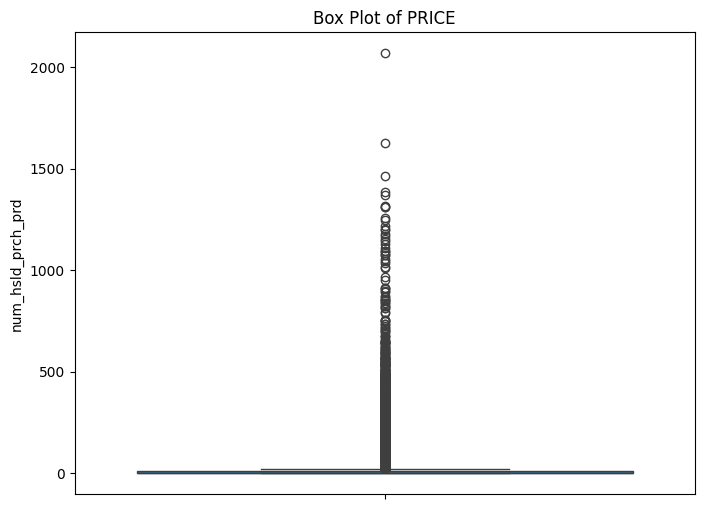

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the `product` DataFrame contains a numeric column you want to plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=d, y='num_hsld_prch_prd')  # Replace 'PRICE' with the column you want to plot

# Add a title
plt.title('Box Plot of PRICE')

# Show the plot
plt.show()


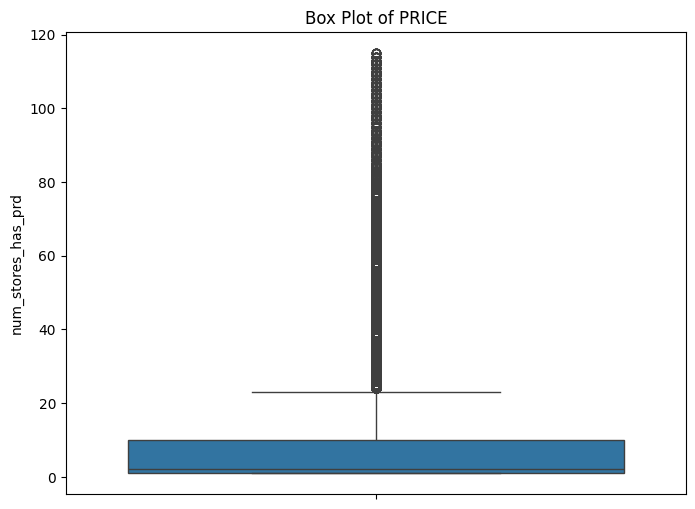

In [249]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=d, y='num_stores_has_prd')  # Replace 'PRICE' with the column you want to plot

# Add a title
plt.title('Box Plot of PRICE')

# Show the plot
plt.show()

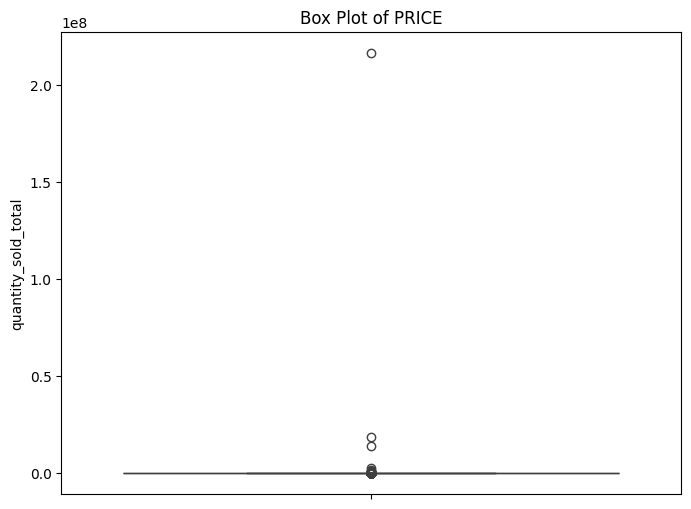

In [250]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=d, y='quantity_sold_total')  # Replace 'PRICE' with the column you want to plot

# Add a title
plt.title('Box Plot of PRICE')

# Show the plot
plt.show()

In [292]:
# statistical approval for numerical columns.
for i in d.select_dtypes(np.number).columns[1:]:
    zero=d.loc[d.Target==0,i]
    ones=d.loc[d.Target==1,i]
    # Ho: Data is normal
    # Ha: Data not normal
    p1=stats.shapiro(zero)[1]
    p2=stats.shapiro(ones)[1]
    if (p1<0.05)&(p2<0.05):
        # Ho: (has no effect) => Target variable is independent of the respected column.
        # Ha: (has an effect) => Target variable is dependant on the respected column.
        print(i,':man',stats.mannwhitneyu(zero,ones)[1])
    else:
        # Ho: (has no effect) => Target variable is independent of the respected column.
        # Ha: (has an effect) => Target variable is dependant on the respected column.
        print(i,':t',stats.ttest_ind(zero,ones)[1])

num_hsld_prch_prd :man 0.0
num_stores_has_prd :man 0.0
quantity_sold_total :man 0.0


In [ ]:
#by doing the appropriate tests we found out that the data is not normally distributed

In [252]:
# Create a copy of the 'd' DataFrame to avoid modifying the original DataFrame
df1 = d.copy()

# Import the TargetEncoder from the category_encoders library
from category_encoders import TargetEncoder

# Initialize the TargetEncoder
te = TargetEncoder()

# Iterate over each column in 'df1' that has an object (categorical) data type
for i in df1.select_dtypes('object').columns:
    # Apply target encoding to the categorical column
    # Target encoding replaces categorical values with a mean of the target variable for each category
    df1[i] = te.fit_transform(df1[i], df1.Target)

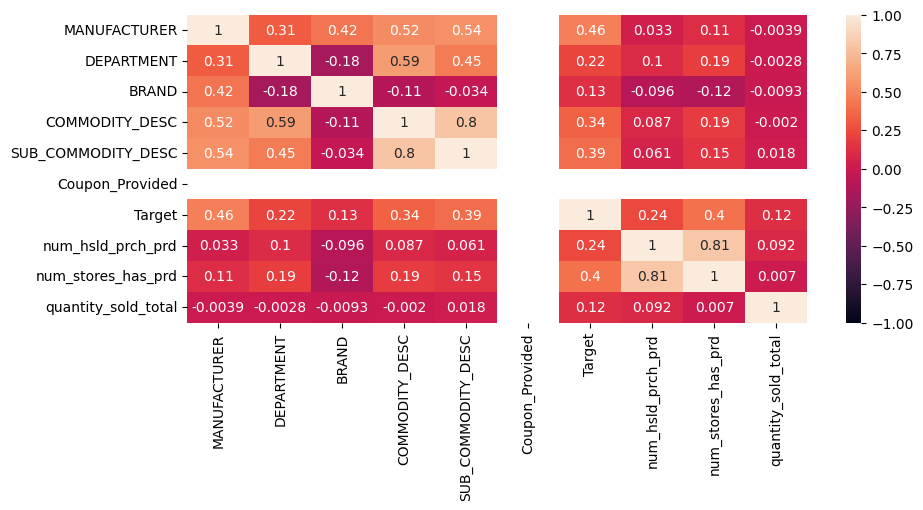

In [253]:
# Create a heatmap to visualize the correlation matrix of the 'df1' DataFrame
plt.figure(figsize=(10,4))
sns.heatmap(df1.corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

In [254]:
# Display the first few rows of the 'df1' DataFrame to get an overview of the data
df1.head()

,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,Coupon_Provided,Target,num_hsld_prch_prd,num_stores_has_prd,quantity_sold_total
PRODUCT_ID,,,,,,,,,,
25671,0.000000,0.222738,0.158725,0.043315,0.043315,0.139713,0.0,3.0,3.0,6.0
26081,0.000000,0.010966,0.158725,0.010966,0.013410,NaN,NaN,1.0,1.0,1.0
26093,0.030415,0.057695,0.029666,0.096398,0.119894,NaN,NaN,1.0,1.0,1.0
26190,0.030415,0.222738,0.029666,0.129730,0.096398,0.139713,0.0,1.0,1.0,1.0
26355,0.030415,0.222738,0.029666,0.262626,0.170981,NaN,NaN,1.0,1.0,2.0


#Encoding ~ trail 1 => Target Encoding

In [257]:
# Display the data types of each column in the 'df1' DataFrame
df1.dtypes

MANUFACTURER           float64
DEPARTMENT             float64
BRAND                  float64
COMMODITY_DESC         float64
SUB_COMMODITY_DESC     float64
Coupon_Provided        float64
Target                 float64
num_hsld_prch_prd      float64
num_stores_has_prd     float64
quantity_sold_total    float64
dtype: object

In [258]:
# checking for correlation with the tgt..
train_df1=df1[df1.Target.notna()]
test_df1=df1[df1.Target.isnull()]

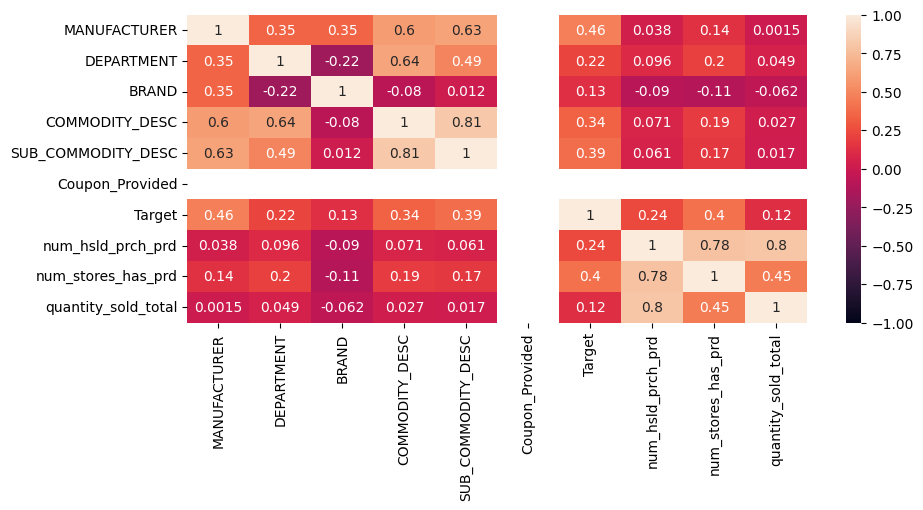

In [259]:
# correlation plot..
plt.figure(figsize=(10,4))
sns.heatmap(train_df1.corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

In [260]:
# splitting into train and test..
xtrain_df1=train_df1.drop(columns='Target')
ytrain_df1=train_df1.Target
xtest_df1=test_df1.drop(columns='Target')

In [261]:
# Display the first few rows of the 'xtrain_df1' DataFrame to get an overview of the data
xtrain_df1.head()

,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,Coupon_Provided,num_hsld_prch_prd,num_stores_has_prd,quantity_sold_total
PRODUCT_ID,,,,,,,,,
25671,0.000000,0.222738,0.158725,0.043315,0.043315,0.139713,3.0,3.0,6.0
26190,0.030415,0.222738,0.029666,0.129730,0.096398,0.139713,1.0,1.0,1.0
26601,0.030415,0.124915,0.029666,0.098569,0.050030,0.139713,1.0,1.0,1.0
26738,0.030415,0.222738,0.029666,0.172626,0.018293,0.139713,1.0,1.0,1.0
26941,0.030415,0.222738,0.029666,0.172626,0.018293,0.139713,1.0,1.0,1.0


In [262]:
# checking for the multicollinearity..
pd.Series([variance_inflation_factor(xtrain_df1.values,i) for i in range(xtrain_df1.shape[1])],index=xtrain_df1.columns).sort_values(ascending=False)
# no multi-collinearity.

Coupon_Provided        19.463437
num_hsld_prch_prd       7.591765
COMMODITY_DESC          4.057077
quantity_sold_total     3.634977
num_stores_has_prd      3.567617
SUB_COMMODITY_DESC      3.297706
MANUFACTURER            2.243485
DEPARTMENT              1.803405
BRAND                   1.407887
dtype: float64

#Encoding ~ trial 2 => pd.factorize

In [263]:
df2=d.copy()
for i in catcol:
    df2[i]=pd.factorize(df2[i])[0]
train_df2=df2[df2.Target.notna()]
test_df2=df2[df2.Target.isnull()]
xtrain_df2=train_df2.drop(columns='Target')
ytrain_df2=train_df2.Target
xtest_df2=df2[df2.Target.isnull()]

In [264]:
# checking multicollinearity.
pd.Series([variance_inflation_factor(xtrain_df2.values,i) for i in range(xtrain_df2.shape[1])],index=xtrain_df2.columns).sort_values(ascending=False)
# no multicollinearity is there.

num_hsld_prch_prd      8.141521
num_stores_has_prd     4.148490
COMMODITY_DESC         3.974942
quantity_sold_total    3.694776
SUB_COMMODITY_DESC     3.646287
DEPARTMENT             2.944606
MANUFACTURER           1.778302
BRAND                  1.143933
Coupon_Provided             NaN
dtype: float64

In [265]:
#df2.drop(columns='magic2',inplace=True)
train_df2=df2[df2.Target.notna()]
test_df2=df2[df2.Target.isnull()]
xtrain_df2=train_df2.drop(columns='Target')
ytrain_df2=train_df2.Target
xtest_df2=df2[df2.Target.isnull()]
pd.Series([variance_inflation_factor(xtrain_df2.values,i) for i in range(xtrain_df2.shape[1])],index=xtrain_df2.columns).sort_values(ascending=False)

num_hsld_prch_prd      8.141521
num_stores_has_prd     4.148490
COMMODITY_DESC         3.974942
quantity_sold_total    3.694776
SUB_COMMODITY_DESC     3.646287
DEPARTMENT             2.944606
MANUFACTURER           1.778302
BRAND                  1.143933
Coupon_Provided             NaN
dtype: float64

In [267]:
#Finalizing the encoding method.

In [268]:
df1.isnull().sum()

MANUFACTURER           25397
DEPARTMENT               417
BRAND                      0
COMMODITY_DESC          5659
SUB_COMMODITY_DESC     25430
Coupon_Provided        47972
Target                 47972
num_hsld_prch_prd          0
num_stores_has_prd         0
quantity_sold_total        0
dtype: int64

In [269]:

df2.isnull().sum()

MANUFACTURER               0
DEPARTMENT                 0
BRAND                      0
COMMODITY_DESC             0
SUB_COMMODITY_DESC         0
Coupon_Provided            0
Target                 47972
num_hsld_prch_prd          0
num_stores_has_prd         0
quantity_sold_total        0
dtype: int64

In [270]:
# df1 is rejected as it contains too many null values is the test set
# reason => many newmanufactures, department, commodities were added lattely.
# df2 => is thus selected. => encoding method => pd.factorize.

##Modeling

In [271]:
# spliting the dataset into train and test.
main_train=df2[df2.Target.notna()]
main_test=df2[df2.Target.isnull()]
main_test=main_test.drop(columns='Target')

In [272]:
# checking shape of train after splitting 
main_train.shape

(43933, 10)

In [273]:
# checking shape of test after splitting 
main_test.shape

(47972, 9)

In [274]:
# further spliting
from sklearn.model_selection import train_test_split
X = main_train.drop(columns='Target')
y = main_train.Target

In [275]:
# Import the train_test_split function from scikit-learn for splitting datasets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X: Features, y: Target variable
# test_size=0.2: Specifies that 20% of the data should be used for testing
# stratify=y: Ensures that the split maintains the same proportion of target classes as in the original dataset
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y)

In [277]:
!pip install xgboost catboost lightgbm

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 4.3 MB/s eta 0:00:30
   ---------------------------------------- 0.2/124.9 MB 2.4 MB/s eta 0:00:53
   ---------------------------------------- 0.2/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 0.3/124.9 MB 1.9 MB/s eta 0:01:06
   ---------------------------------------- 0.4/124.9 MB 1.8 MB/s eta 0:01:11
   ---------------------------------------- 0.5/124.9 MB 1.7 MB/s eta 0:01:16
   ---------------------------------------- 0.5/124.9 MB 1.6 MB/s eta 0:01:18
   ---------------------------------------- 0.6/124.9 MB 1.5 MB/s eta 0:01:21
   ---------------------------------------- 0.6/124.9 MB 1.5 MB/s eta 0:01:23
   ---------------------------------------- 0.7/124.9 MB 1.5 MB/s eta 0:01:25
   ---------------------------------------- 0.7/124.9 MB 1.5 MB/s eta 0:01:26
   ---------------------------------------- 0.8/124.9 MB 1.5 MB/s eta 0


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   -------------------------------- ------- 101.2/124.9 MB 1.2 MB/s eta 0:00:20
   -------------------------------- ------- 101.2/124.9 MB 1.2 MB/s eta 0:00:20
   -------------------------------- ------- 101.3/124.9 MB 1.2 MB/s eta 0:00:19
   -------------------------------- ------- 101.3/124.9 MB 1.2 MB/s eta 0:00:19
   -------------------------------- ------- 101.4/124.9 MB 1.2 MB/s eta 0:00:19
   -------------------------------- ------- 101.5/124.9 MB 1.2 MB/s eta 0:00:19
   -------------------------------- ------- 101.5/124.9 MB 1.2 MB/s eta 0:00:19
   -------------------------------- ------- 101.6/124.9 MB 1.2 MB/s eta 0:00:19
   -------------------------------- ------- 101.6/124.9 MB 1.2 MB/s eta 0:00:19
   -------------------------------- ------- 101.7/124.9 MB 1.2 MB/s eta 0:00:19
   -------------------------------- ------- 101.8/124.9 MB 1.2 MB/s eta 0:00:19
   -------------------------------- ------- 101.8/124.9 MB 1.2 MB/s eta 0:00:19
   -------------------------------- ----

In [278]:
# importing Models..

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

knn=KNeighborsClassifier()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()
gbm=GradientBoostingClassifier()
xgb=XGBClassifier()
cat=CatBoostClassifier()
lgbm=LGBMClassifier()
l=[knn,nb,dt,rfc,ada,gbm,xgb,lgbm]

In [279]:
l

[KNeighborsClassifier(),
 GaussianNB(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 LGBMClassifier()]

In [280]:
l1=['knn','nb','dt','rfc','ada','gbm','xgbm','lgbm']

In [281]:
# modeling X and testing on X iself.
dic_train=pd.DataFrame()
j=0;
for i in l:
    m=i.fit(X,y)
    pred=m.predict(X)
    print(i,':')
    print(confusion_matrix(y,pred))
    dic_train.loc[j,'Model']=l1[j]
    dic_train.loc[j,'accuracy_score']=accuracy_score(y,pred)
    dic_train.loc[j,'f1_score']=f1_score(y,pred)
    dic_train.loc[j,'recall_score']=recall_score(y,pred)
    dic_train.loc[j,'precision_score']=precision_score(y,pred)
    j+=1
    print()

KNeighborsClassifier() :
[[36656  1139]
 [ 2190  3948]]

GaussianNB() :
[[36071  1724]
 [ 3598  2540]]

DecisionTreeClassifier() :
[[37779    16]
 [  455  5683]]

RandomForestClassifier() :
[[37754    41]
 [  431  5707]]

AdaBoostClassifier() :
[[36018  1777]
 [ 2837  3301]]

GradientBoostingClassifier() :
[[36261  1534]
 [ 2731  3407]]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=No

In [282]:
dic_train.sort_values(['f1_score'],ascending=False)
# here the best performance is given by => RandomForestClassifier(), DecisionTreeClassifier().

,Model,accuracy_score,f1_score,recall_score,precision_score
3,rfc,0.989256,0.960289,0.929782,0.992867
2,dt,0.989279,0.960210,0.925872,0.997192
6,xgbm,0.936540,0.750804,0.684262,0.831683
0,knn,0.924226,0.703430,0.643206,0.776096
7,lgbm,0.922655,0.691763,0.621212,0.780393
5,gbm,0.902920,0.615037,0.555067,0.689537
4,ada,0.894976,0.588623,0.537797,0.650059
1,nb,0.878861,0.488368,0.413816,0.595685


In [284]:
# modeling train and testing on test
dic_test=pd.DataFrame()
j=0;
l1=['knn','nb','dt','rfc','ada','gbm','xgbm','lgbm']
for i in l:
    m=i.fit(xtrain,ytrain)
    pred=m.predict(xtest)
    print(i,':')
    print(confusion_matrix(ytest,pred))
    dic_test.loc[j,'Model']=l1[j]
    dic_test.loc[j,'accuracy_score']=accuracy_score(ytest,pred)
    dic_test.loc[j,'f1_score']=f1_score(ytest,pred)
    dic_test.loc[j,'recall_score']=recall_score(ytest,pred)
    dic_test.loc[j,'precision_score']=precision_score(ytest,pred)
    j+=1
    print()

KNeighborsClassifier() :
[[7178  381]
 [ 627  601]]

GaussianNB() :
[[7219  340]
 [ 751  477]]

DecisionTreeClassifier() :
[[7061  498]
 [ 568  660]]

RandomForestClassifier() :
[[7254  305]
 [ 574  654]]

AdaBoostClassifier() :
[[7216  343]
 [ 619  609]]

GradientBoostingClassifier() :
[[7238  321]
 [ 575  653]]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n

In [285]:
dic_test.sort_values(['f1_score'],ascending=False)
# XGBClassifier() => performs best. 
# => tuning of hyperparameter might improve performance.

,Model,accuracy_score,f1_score,recall_score,precision_score
6,xgbm,0.910550,0.640110,0.569218,0.731172
7,lgbm,0.906225,0.620276,0.548046,0.714437
3,rfc,0.899966,0.598080,0.532573,0.681960
5,gbm,0.898031,0.593097,0.531759,0.670431
4,ada,0.890520,0.558716,0.495928,0.639706
2,dt,0.878684,0.553227,0.537459,0.569948
0,knn,0.885285,0.543891,0.489414,0.612016
1,nb,0.875839,0.466504,0.388436,0.583843
